# 공모전 선정 기준

1. 비정형데이터보단 변수 간 관계를 분석하고, 파생변수를 만들어 데이터의 설명력을 높일 수 있는 정형 데이터를 선호했습니다.

2. 공모전 수상을 목표로 하기보단 하나의 데이터에 여러 방법으로 전처리를 해보고, 다양한 모델을 학습시키며 데이터 분석 경험을 넓히고자 하였습니다.

그래서 회귀 모델과 시계열 모델 둘 다 적용시킬 수 있는 전력사용량 예측 AI 경진대회를 선택하게 되었습니다.

# 팀프로젝트 데이콘 전력사용량 예측 AI 경진대회

1. 주제

전력 수요 예측 시뮬레이션을 통한 효율적인 인공지능 알고리즘 발굴

전력 융합 신서비스 발굴 및 비즈니스 모델 개발 활용

디지털 뉴딜의 성공을 위한 인공지능(AI)의 융합, 확산을 촉진

2. 대회 설명

건물 정보와 기후 정보를 활용한 전력사용량 에측


3. 주최 / 주관

주최 : 한국에너지공단

주관 : DACON


4. 참가 대상

AI 혹은 빅데이터에 관심 있는 누구나

학교, 기업, 교육 업체 등 단체에서 자유롭게 참가 가능

링크 : https://www.dacon.io/competitions/official/235736/overview/description

## 데이터 정보

train.csv :

train 데이터 : 60개 건물들의 2020년 6월 1일 부터 2020년 8월 24일까지의 데이터 1시간 단위로 제공, 전력사용량(kWh) 포함

train.shape: (122400, 10)


test.csv :

test 데이터 : 60개 건물들의 2020년 8월 25일 부터 2020년 8월 31일까지의 데이터
3시간 단위로 제공 (강수량의 경우 6시간 단위로 제공, 예보데이터), 전력사용량(kWh) 미포함

test.shape: (10080, 9)

## 변수 정보

num : 건물번호  
date_time : 연월일시  
전력사용량 -> usage  
기온 -> temp  
풍속 -> wind  
습도 -> humidity  
강수량 -> precipitation  
일조 -> sunshine  
비전기냉방설비운영 -> operation_non_elec  
태양광보유 -> solar

In [1]:
# 필요한 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# from google.colab import drive

# drive.mount('/content/drive')

In [2]:
# 데이터 불러오기
directory = './energy'

train_energy = pd.read_csv(directory + '/train.csv', encoding = 'euc-kr')
test_energy = pd.read_csv(directory + '/test.csv', encoding = 'euc-kr')

# 작업을 위해 사본 저장
train_dataset = train_energy.copy()
test_dataset = test_energy.copy()

In [3]:
# 데이터 변수명 변경
train_columns_name = ['num', 'date_time', 'usage', 'temp', 'wind', 'humidity', 'precipitation', 'sunshine', 'operation_non_elec', 'solar']
test_columns_name = ['num', 'date_time', 'temp', 'wind', 'humidity', 'precipitation', 'sunshine', 'operation_non_elec', 'solar']

train_dataset.columns = train_columns_name
test_dataset.columns = test_columns_name

In [4]:
# train 데이터의 변수 정보 확인
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   num                 122400 non-null  int64  
 1   date_time           122400 non-null  object 
 2   usage               122400 non-null  float64
 3   temp                122400 non-null  float64
 4   wind                122400 non-null  float64
 5   humidity            122400 non-null  float64
 6   precipitation       122400 non-null  float64
 7   sunshine            122400 non-null  float64
 8   operation_non_elec  122400 non-null  float64
 9   solar               122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [5]:
# test 데이터의 변수 정보 확인
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num                 10080 non-null  int64  
 1   date_time           10080 non-null  object 
 2   temp                3360 non-null   float64
 3   wind                3360 non-null   float64
 4   humidity            3360 non-null   float64
 5   precipitation       1680 non-null   float64
 6   sunshine            3360 non-null   float64
 7   operation_non_elec  2296 non-null   float64
 8   solar               1624 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 708.9+ KB


In [6]:
# train, test 변수의 데이터 타입 변경
train_dtypes = {}
train_dtypes_list = ['category', 'object', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'category', 'category']

for index, value in enumerate(train_dataset.columns):
    train_dtypes[value] = train_dtypes_list[index]

test_dtypes = {}
test_dtypes_list = ['category', 'object', 'float64', 'float64', 'float64', 'float64', 'float64', 'category', 'category']

for index, value in enumerate(test_dataset.columns):
    test_dtypes[value] = test_dtypes_list[index]

train_dataset = train_dataset.astype(train_dtypes)
test_dataset = test_dataset.astype(test_dtypes)

# date_time 변수를 '%Y-%m-%d %H' 형태의 시간 변수로 변환
train_dataset['date_time'] = pd.to_datetime(train_dataset['date_time'], format='%Y-%m-%d %H')
test_dataset['date_time'] = pd.to_datetime(test_dataset['date_time'], format='%Y-%m-%d %H')

In [7]:
# train의 데이터 샘플
train_dataset.head()

,num,date_time,usage,temp,wind,humidity,precipitation,sunshine,operation_non_elec,solar
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [8]:
# test의 데이터 샘플
test_dataset.head()

,num,date_time,temp,wind,humidity,precipitation,sunshine,operation_non_elec,solar
0,1,2020-08-25 00:00:00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03:00:00,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. 시각화

### 1. 건물별 전력사용량 평균

각 건물별로 전력사용량의 평균이 다릅니다. 이는 건물별 전력사용량의 분포가 다르다는 것을 의미합니다. 따라서 모델링을 위해 학습 데이터를 구성할 때 다음과 같은 방법을 고려할 수 있습니다.

1) 건물 번호를 범주형 변수로 사용

2) 사용량이 비슷한 또는 사용 패턴이 비슷한 건물끼리 군집화하여 군집 번호를 범주형 변수로 사용

3) 건물별로 데이터를 쪼개서 각각 모델링을 하는 방법

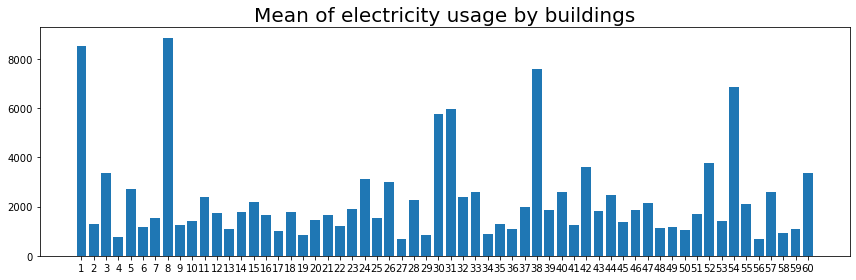

In [9]:
# 건물별 전력사용량 평균 막대그래프
usage_sumamry_by_num = train_dataset.pivot_table(values = 'usage', index = 'num', aggfunc = np.mean)

plt.figure(figsize = (12, 4))
plt.bar(usage_sumamry_by_num.index, usage_sumamry_by_num.usage)
plt.title('Mean of electricity usage by buildings', fontsize = 20)
plt.xticks(list(range(1, 61)))
plt.tight_layout()
plt.show()

### 2. 비전기 냉방설비 운영, 태양광 보유 여부

비전기 냉방설비 운영 여부와 태양광 보유 여부에 따라 전력사용량의 평균이 다릅니다. 따라서, 건물 번호를 범주형 변수로 사용하여 학습 데이터를 구성할 경우, 비전기 냉방설비 운영 여부와 태양광 보유 여부도 범주형 변수로 사용할 필요가 있습니다.

또는 건물별로 데이터를 쪼개서 각각 모델링 하는 경우, 건물 번호 안에 비전기 냉방설비 운영 여부와 태양광 보유 여부 정보가 포함되어 있으므로 두 변수를 제외하고 학습 데이터를 구성해도 된다고 생각합니다.

두 변수의 상호작용항을 제거했을 때의 전력사용량 평균 막대그래프를 확인했을 때, 시각적으로 그룹 간 평균의 차이가 존재합니다. 하지만 tree 기반의 모델들을 후보 모델로 고려하고 있기 때문에 상호작용항을 학습데이터에 포함시키지 않아도 된다고 생각합니다.

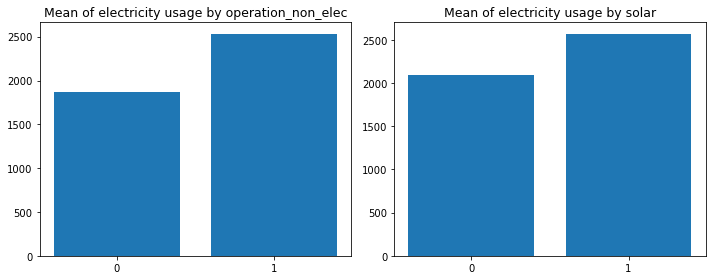

In [10]:
# 비전기 냉방설비 운영별 전력사용량 평균 계산, 태양광 보유별 전력사용량 평균 계산
usage_sumamry_by_elec = train_dataset.pivot_table(values = 'usage', index = 'operation_non_elec', aggfunc = np.mean)
usage_sumamry_by_solar = train_dataset.pivot_table(values = 'usage', index = 'solar', aggfunc = np.mean)

plt.figure(figsize = (10, 4))

# 비전기 냉방설비 운영별 전력사용량 평균 막대그래프
plt.subplot(1, 2, 1)
plt.bar(usage_sumamry_by_elec.index, usage_sumamry_by_elec.usage)
plt.title('Mean of electricity usage by operation_non_elec', fontsize = 12.5)
plt.xticks(list(range(0, 2)))

# 태양광 보유별 전력사용량 평균 막대그래프
plt.subplot(1, 2, 2)
plt.bar(usage_sumamry_by_solar.index, usage_sumamry_by_solar.usage)
plt.title('Mean of electricity usage by solar', fontsize = 12.5)
plt.xticks(list(range(0, 2)))

plt.tight_layout()
plt.show()

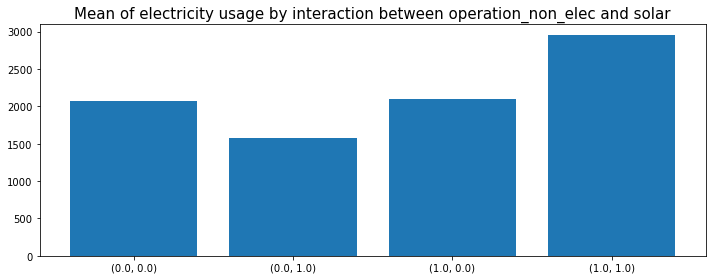

In [11]:
# 두 변수의 상호작용항을 제거하는 변수 생성
interaction_operation_non_elec_solar = []

for index in range(train_dataset.shape[0]):
    interaction = '(' + str(train_dataset.operation_non_elec[index]) + ', ' + str(train_dataset.solar[index]) + ')'
    interaction_operation_non_elec_solar.append(interaction)

train_dataset['interaction_operation_non_elec_solar'] = interaction_operation_non_elec_solar

# 값별로 전력사용량의 평균 계산
usage_sumamry_by_interaction = train_dataset.pivot_table(values = 'usage', index = 'interaction_operation_non_elec_solar', aggfunc = np.mean)

# 비전기 냉방설비 운영과 태양광 보유의 상호작용을 제거한 변수의 전력사용량 평균 막대그래프
plt.figure(figsize = (10, 4))
plt.bar(usage_sumamry_by_interaction.index, usage_sumamry_by_interaction.usage)
plt.title('Mean of electricity usage by interaction between operation_non_elec and solar', fontsize = 15)

plt.tight_layout()
plt.show()

### 3. 건물, 요일별 전력사용량

요일별로 막대그래프를 확인했을 때, 주말의 영향을 받는 건물도 있고 받지 않는 건물도 있습니다. 주말의 영향을 받는 건물들에서 전력사용량의 변동을 잡아주기 위해 요일을 범주화 변수로 사용하겠습니다.

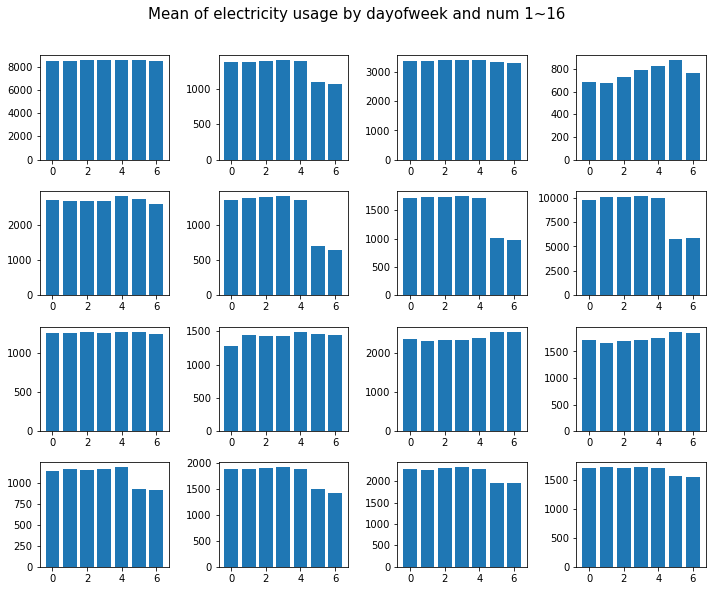

In [12]:
# 요일 변수 추가
train_dataset['dayofweek'] = train_dataset['date_time'].dt.dayofweek

# 건물, 요일별로 전력사용량의 평균 계산
usage_sumamry_by_num_dayofweek = train_dataset.groupby(by = ['num', 'dayofweek']).mean()[['usage']]
usage_sumamry_by_num_dayofweek.reset_index(inplace = True)

# 요일별 전력사용량 평균 막대그래프 출력
fig, axes = plt.subplots(figsize = (10, 8), nrows = 4, ncols = 4)
axes = axes.ravel()

for index in range(len(axes)):
    axes[index].bar(usage_sumamry_by_num_dayofweek.loc[usage_sumamry_by_num_dayofweek.num == index + 1, 'dayofweek'],
                    usage_sumamry_by_num_dayofweek.loc[usage_sumamry_by_num_dayofweek.num == index + 1, 'usage'])

fig.suptitle('Mean of electricity usage by dayofweek and num 1~16', fontsize = 15, y = 1.02)
plt.tight_layout()
plt.show()

### 4. 건물별 연속형 변수의 상관관계

usage와 다른 변수 간 상관계수의 분포

temp : 대부분 양의 상관관계를 가지고, 0.4 ~ 0.6에서 빈도가 높음

wind : 대부분 양의 상관관계를 가지고, 0.2 주변 빈도가 높음

humidity : 대부분 음의 상관관계를 가지고, -0.4 ~ -0.1에서 빈도가 높음

precipitation : 상관관계가 강하지 않고, 대부분 -0.05 ~ 0.05 사이의 값을 가짐

sunshine : 대부분 양의 상관관계를 가지고 0.4 ~ 0.5에서 빈도가 높음

건물별 연속형 변수의 상관관계를 계산하여 변수별로 히스토그램을 출력했을 때, 상관계수의 분포가 퍼져있음을 알 수 있습니다. 따라서 데이터를 쪼개서 각각 모델링하는 방법도 시도해볼만하다고 생각합니다.

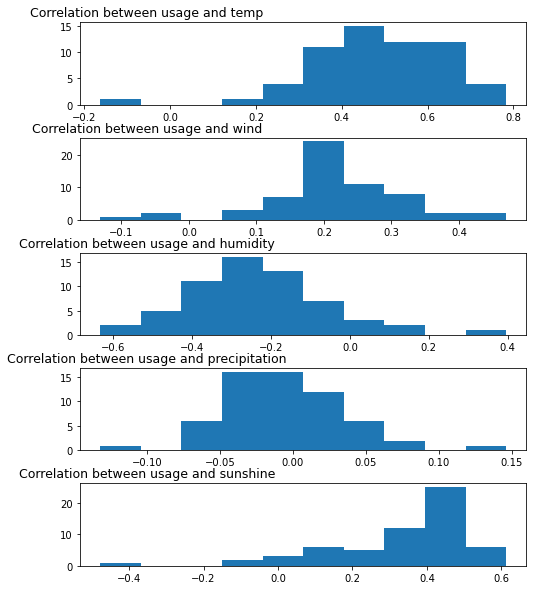

In [13]:
# 건물별로 데이터를 분리
train_dataset_by_num = [train_dataset.loc[train_dataset.num == index, ['usage', 'temp', 'wind', 'humidity', 'precipitation', 'sunshine']].copy()
                        for index in range(1, 61)]

# 건물별 데이터로 변수간 상관계수 계산
train_dataset_by_num_corr = [train_dataset_by_num[index].corr() for index in range(0, 60)]

# 전력사용량의 상관계수만 추출
column_name = list(train_dataset_by_num_corr[0].columns)
corr_usage_other = [[train_dataset_by_num_corr[index1].iloc[0, index2] for index1 in range(0, 60)] for index2 in range(1, 6)]

# 변수별로 히스토그램 출력
fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize = (8, 10))
axes = axes.ravel()
fig.subplots_adjust(hspace = 0.4)

for index, value in enumerate(corr_usage_other):
    axes[index].hist(value)
    axes[index].set_title('Correlation between usage and ' + column_name[index + 1], x = 0.15, fontsize = 12.5)

plt.show()

### 5. 건물별 군집화

건물별 군집화를 통해 건물의 유형을 효과적으로 분류할 수 있는지 확인해보고, 학습 데이터를 구성할 때 건물번호 변수를 줄일 수 있는지 확인해보려고 합니다.

In [14]:
pip install tslearn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import cdist_dtw

In [16]:
# 일 변수 추가
train_dataset['dayofyear'] = train_dataset['date_time'].dt.dayofyear

# 건물, 일별로 usage의 평균 계산
usage_by_num_dayofyear = train_dataset.loc[:, ['num', 'dayofyear', 'usage']].groupby(['num', 'dayofyear']).mean().reset_index()

# 건물별로 데이터프레임 분리하여 usage만 저장한 뒤 하나의 데이터프레임으로 합치기
usage_by_num_dayofyear_list = [usage_by_num_dayofyear.loc[usage_by_num_dayofyear.num == index, 'usage'].copy().reset_index(drop = True)
                               for index in range(1, 61)]

usage_by_num_dayofyear_df = pd.concat(usage_by_num_dayofyear_list, axis = 1)

# 제대로 실행되었는지 확인
print(usage_by_num_dayofyear_df.shape)

(85, 60)


In [17]:
inertia_list = []

# 시계열 군집화
# 후보 군집 개수는 2개 ~ 15개
# 군집화의 기준 통계량은 dtw를 사용
for n_cluster in range(2, 15):
    km = TimeSeriesKMeans(n_clusters = n_cluster,
                          metric = 'dtw',
                          max_iter = 100,
                          random_state = 42).fit(usage_by_num_dayofyear_df.T) 
    inertia_list.append(km.inertia_)

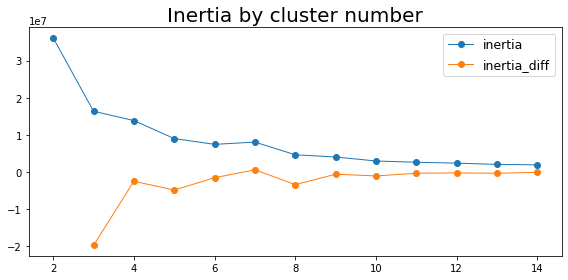

In [18]:
# 군집화 결과 확인

plt.figure(figsize = (8, 4))
plt.plot(np.array(range(2, 15)), inertia_list, marker='o', linewidth=1,label='inertia')
plt.plot(np.array(range(2, 15)), pd.Series(inertia_list).diff(), marker='o', linewidth=1,label='inertia_diff')
plt.title('Inertia by cluster number',fontsize=20)
plt.legend(fontsize = 12.5)

plt.tight_layout()
plt.show()

inertia가 서서히 감소하기 시작하는 군집 개수 8개가 적당해 보입니다. 군집별로 일별 평균 사용량의 그래프를 그려보도록 하겠습니다.

In [19]:
# 최적 군집 개수로 시계열 군집화 실행
best_n_cluster = 8
km = TimeSeriesKMeans(n_clusters = best_n_cluster,
                      metric = 'dtw',
                      max_iter = 100,
                      random_state = 42).fit(usage_by_num_dayofyear_df.T)

# 시계열 군집화 모델 정보 확인
print(km)

TimeSeriesKMeans(max_iter=100, metric='dtw', n_clusters=8, random_state=42)


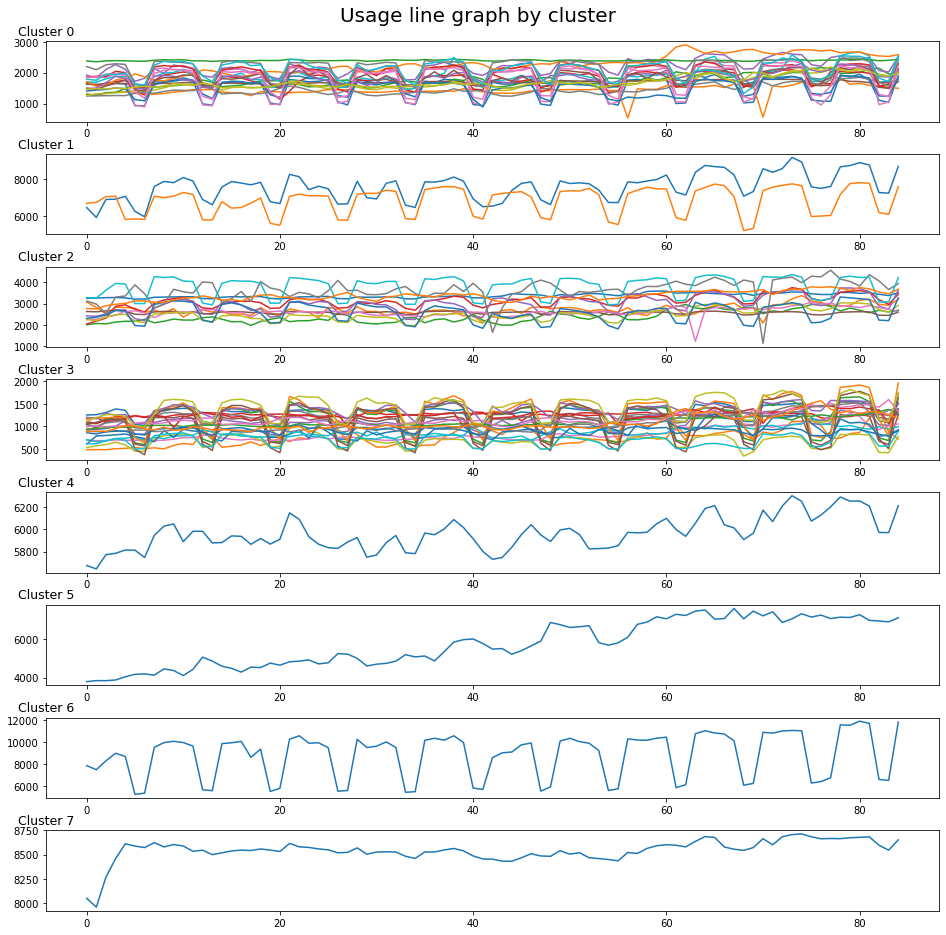

In [20]:
# 군집별로 데이터 분리
usage_by_num_dayofyear_df.columns = ['num' + str(index) for index in range(1, 61)]
usage_by_num_dayofyear_cluster = [usage_by_num_dayofyear_df.iloc[:, np.where(km.labels_ == index)[0]].copy() for index in range(best_n_cluster)]

# 군집별 전력사용량 평균 그래프 출력
fig, axes = plt.subplots(nrows = best_n_cluster, ncols = 1, figsize = (16, 16))
axes = axes.ravel()
fig.subplots_adjust(hspace = 0.4)

for index1 in range(best_n_cluster):
    for index2 in range(usage_by_num_dayofyear_cluster[index1].shape[1]):
        axes[index1].plot(usage_by_num_dayofyear_cluster[index1].iloc[:, index2], label = usage_by_num_dayofyear_cluster[index1].columns[index2])
        axes[index1].set_title('Cluster ' + str(index1), x = 0, fontsize = 12.5)

fig.suptitle("Usage line graph by cluster", y = 0.91, fontsize = 20)

plt.show()

Cluster 0 : 1000 ~ 3000 사이에 분포, 그룹에 포함된 건물이 많아서 자세하게 유형 설명 불가

Cluster 1 : 6000 ~ 8000 사이에 분포, 주말의 영향을 받음

Cluster 2 : 1500 ~ 4500 사이에 분포, 그룹에 포함된 건물이 많아서 자세하게 유형 설명 불가

Cluster 3 : 500 ~ 2000 사이에 분포, 그룹에 포함된 건물이 많아서 자세하게 유형 설명 불가

Cluster 4 : 5500 ~ 6500 사이에 분포, 변동폭이 작은 편이고 다른 건물들에 비해 규칙성이 약한 것으로 보임

Cluster 5 : 4000 ~ 7500 사이에 분포, 주말의 영향을 받지 않고, 서서히 증가하는 형태를 띰

Cluster 6 : 6000 ~ 12000 사이에 분포, 주말의 영향을 받음

Cluster 7 : 8000 ~ 9000 사이에 분포, 주말의 영향을 받지 않고, 변동폭이 가장 작음

inertia를 기준으로 군집을 분류하였으나, 0, 1, 3 군집처럼 유형을 정의할 수 없는 군집이 존재합니다. 따라서 군집화 결과를 학습 데이터에 반영해 사용하기엔 무리가 있어 보입니다.

### 6. 건물별 전력사용량 그래프

마지막으로 타겟변수인 전력사용량에서 이상치가 있는지 확인하기 위해 건물별 전력사용량 그래프를 출력해보도록 하겠습니다.

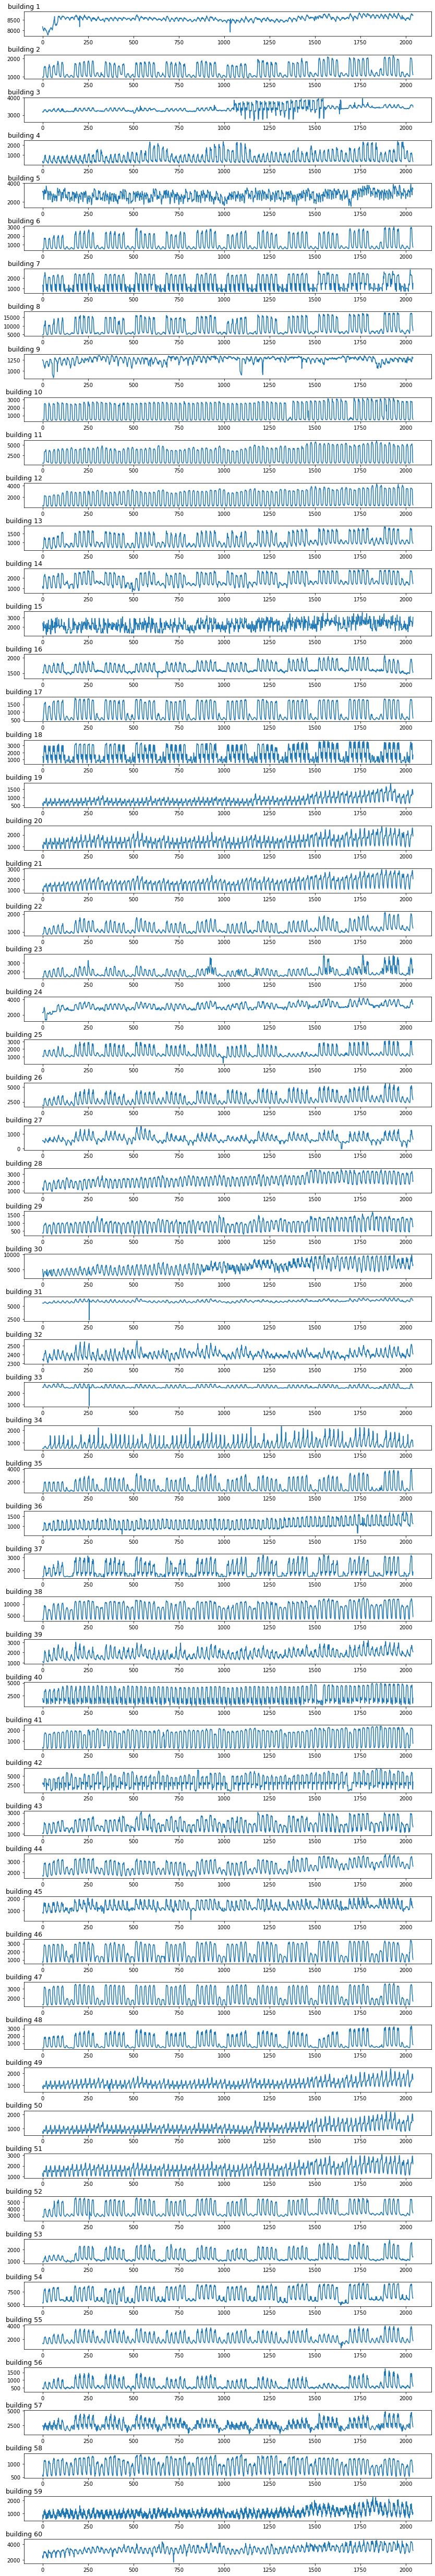

In [21]:
# 건물별로 전력사용량만 추출
train_usage_list_by_num = [train_dataset.loc[train_dataset.num == index, 'usage'].copy().reset_index(drop = True) for index in range(1, 61)]

# 그래프로 출력
fig, axes = plt.subplots(figsize = (14, 1.5 * 60), nrows = 60, ncols = 1)
fig.subplots_adjust(hspace = 0.75)
axes = axes.ravel()

for index in range(60):
    axes[index].plot(train_usage_list_by_num[index])
    axes[index].set_title("building {}".format(index + 1), size = 12.5, x = 0)

plt.show()

1번, 9번, 16번, 25번, 27번, 31번, 33번, 36번, 45번, 52번, 55번, 60번에 이상치가 있어보여서 따로 출력해보겠습니다.

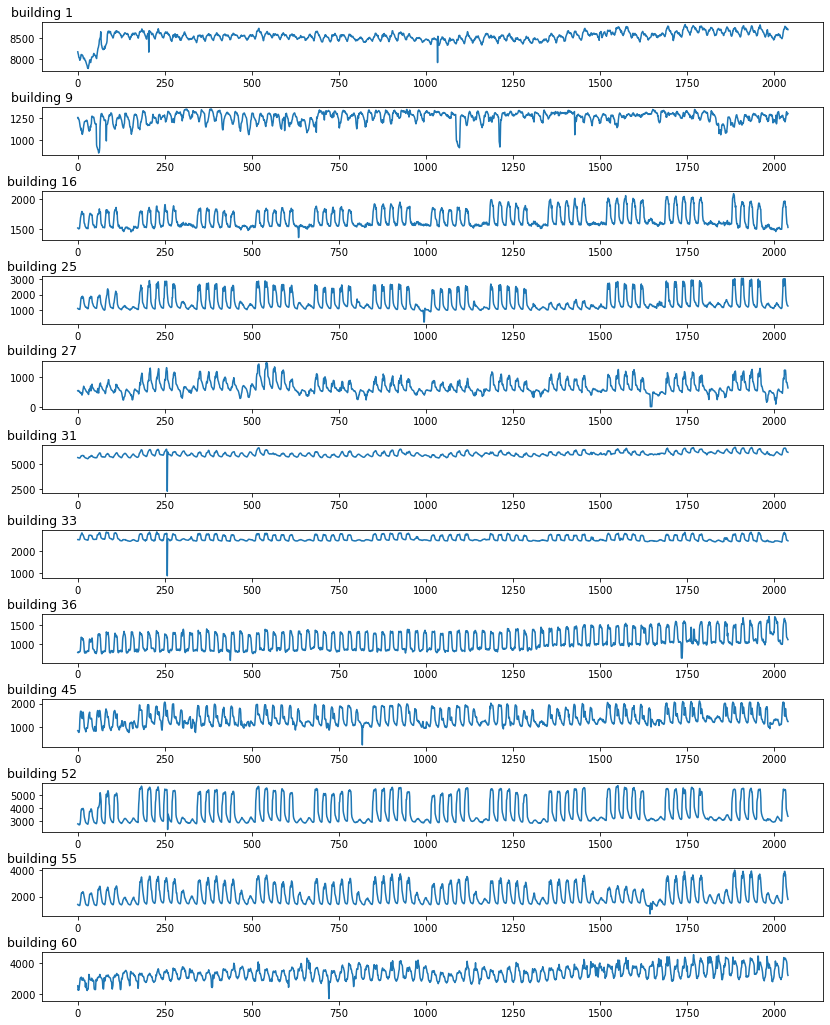

In [22]:
# 이상치가 존재하는 건물의 전력사용량 그래프 출력
outlier_num = [1, 9, 16, 25, 27, 31, 33, 36, 45, 52, 55, 60]
fig, axes = plt.subplots(figsize = (14, 1.5 * len(outlier_num)), nrows = len(outlier_num), ncols = 1)
fig.subplots_adjust(hspace = 0.75)
axes = axes.ravel()

for index, value in enumerate(outlier_num):
    axes[index].plot(train_usage_list_by_num[value - 1])
    axes[index].set_title("building {}".format(value), size = 12.5, x = 0)

plt.show()

이상치로 판단한 데이터의 위치는 다음과 같습니다.

1번 건물 : 204, 1033

9번 건물 : 1427

16번 건물 : 634

25번 건물 : 994, 995

27번 건물 : 1644, 1645, 1646, 1647, 1648

31번 건물 : 257

33번 건물 : 257

36번 건물 : 438, 1733, 1734, 1735, 1736

45번 건물 : 817

52번 건물 : 258

55번 건물 : 1643

60번 건물 : 721

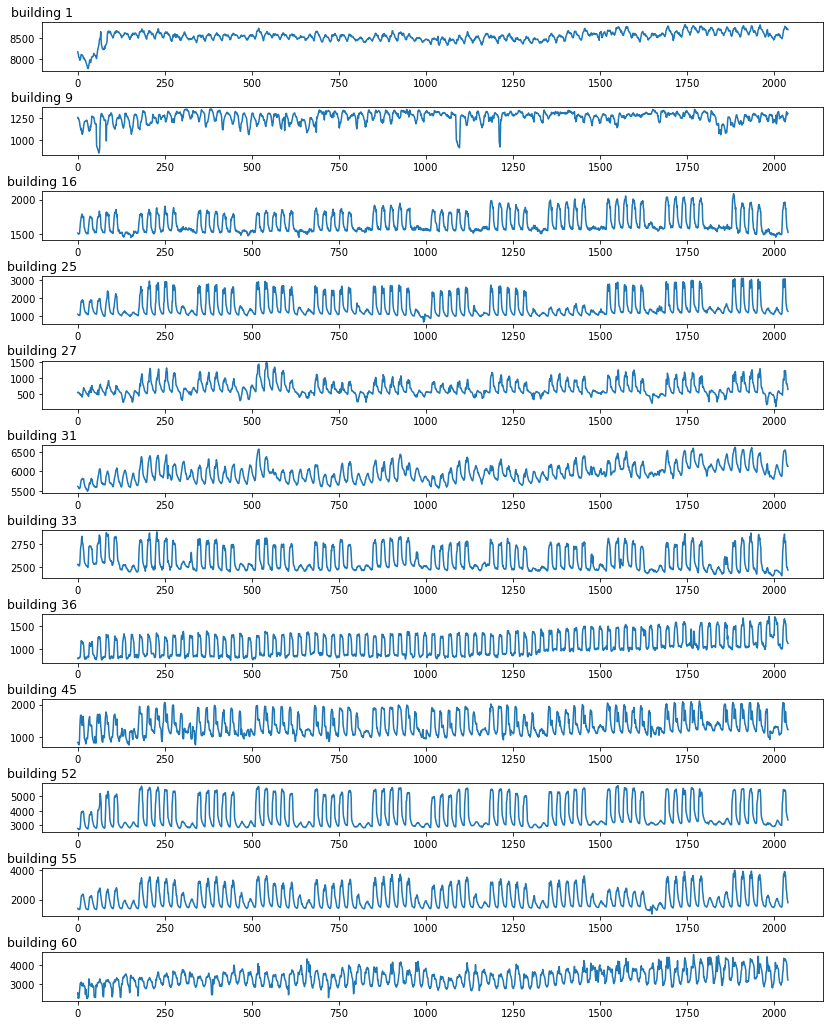

In [23]:
# 이상치를 이전값과 이후값의 평균으로 대체
# 여러개인 경우엔 이상치 전후의 값의 등간격인 값들로 대체
train_usage_list_by_num[0][204] = (train_usage_list_by_num[0][203] + train_usage_list_by_num[0][205]) / 2
train_usage_list_by_num[0][1033] = (train_usage_list_by_num[0][1032] + train_usage_list_by_num[0][1034]) / 2
train_usage_list_by_num[8][1427] = (train_usage_list_by_num[8][1426] + train_usage_list_by_num[8][1428]) / 2
train_usage_list_by_num[15][634] = (train_usage_list_by_num[15][633] + train_usage_list_by_num[15][635]) / 2
train_usage_list_by_num[24][994] = (train_usage_list_by_num[24][993] + train_usage_list_by_num[24][996]) / 2
train_usage_list_by_num[24][995] = (train_usage_list_by_num[24][993] + train_usage_list_by_num[24][996]) / 2
train_usage_list_by_num[26][1644:1649] = np.round(np.linspace(train_usage_list_by_num[26][1643], train_usage_list_by_num[26][1649], 7)[1:-1], 3)
train_usage_list_by_num[30][257] = (train_usage_list_by_num[30][256] + train_usage_list_by_num[30][258]) / 2
train_usage_list_by_num[32][257] = (train_usage_list_by_num[32][256] + train_usage_list_by_num[32][258]) / 2
train_usage_list_by_num[35][438] = (train_usage_list_by_num[35][437] + train_usage_list_by_num[35][439]) / 2
train_usage_list_by_num[35][1733:1737] = np.round(np.linspace(train_usage_list_by_num[35][1732], train_usage_list_by_num[35][1737], 6)[1:-1], 3)
train_usage_list_by_num[44][817] = (train_usage_list_by_num[44][816] + train_usage_list_by_num[44][818]) / 2
train_usage_list_by_num[51][258] = (train_usage_list_by_num[51][257] + train_usage_list_by_num[51][259]) / 2
train_usage_list_by_num[54][1643] = (train_usage_list_by_num[54][1642] + train_usage_list_by_num[54][1644]) / 2
train_usage_list_by_num[59][721] = (train_usage_list_by_num[59][720] + train_usage_list_by_num[59][722]) / 2

# 이상치를 제거한 뒤 건물의 전력사용량 그래프 출력
fig, axes = plt.subplots(figsize = (14, 1.5 * len(outlier_num)), nrows = len(outlier_num), ncols = 1)
fig.subplots_adjust(hspace = 0.75)
axes = axes.ravel()

for index, value in enumerate(outlier_num):
    axes[index].plot(train_usage_list_by_num[value - 1])
    axes[index].set_title("building {}".format(value), size = 12.5, x = 0)

plt.show()

이상치를 제거된 것을 확인할 수 있습니다.

# 2. 전처리

## 전처리 ver.1

60개의 건물 데이터를 하나의 table 형태로 저장

1. 변수명 변경

2. 변수 타입 변경

3. test에 결측치 채워넣기

 - operation_non_elec, solar는 train에서 join

 - temp, wind, humidity, precipitation, sunshine는 건물별로 선형 보간법을 이용

4. 요일 변수 추가

5. 파생변수 생성

  $불쾌지수 = \frac{9}{5} * 기온 - 0.55 * (1 - 상대습도) * (\frac{9}{5} * 기온 - 26) + 32$

  $체감온도 = 13.12 + 0.6215 * 기온 - 11.37 * 풍속^{0.16} + 0.3965 * 풍속^{0.16} * 기온$

  sunshine 변수의 이동평균을 다음과 같은 조건을 이용해 건물별로 계산 : rolling(window = 4, min_periods = 1, center = False)

6. 건물 번호를 원핫인코딩

7. 요일 변수를 원핫인코딩

In [24]:
def preprocessing_dataset(train, test):
    '''train dataset, test dataset 전처리'''
    
    # 불쾌지수, 체감온도 계산 함수 정의
    def calculate_discomfort_index(temp, humidity):
        '''불쾌지수 계산'''
        discomfort_index = 9 * temp / 5 - 0.55 * (1 - humidity / 100) * (9 * temp / 5 - 26) + 32
        return discomfort_index

    def calculate_windchill_temp(temp, wind):
        '''체감온도 계산'''
        windchill_temp = 13.12 + 0.6215 * temp - 11.37 * (wind ** 0.16) + 0.3965 * (wind ** 0.16) * temp
        return windchill_temp

    # 원본에 영향이 가지 않게 사본 저장
    train_dataset = train.copy()
    test_dataset = test.copy()

    # 1. 변수명 변경
    train_columns_name = ['num', 'date_time', 'usage', 'temp', 'wind', 'humidity', 'precipitation', 'sunshine', 'operation_non_elec', 'solar']
    test_columns_name = ['num', 'date_time', 'temp', 'wind', 'humidity', 'precipitation', 'sunshine', 'operation_non_elec', 'solar']

    train_dataset.columns = train_columns_name
    test_dataset.columns = test_columns_name

    # 2. train, test 변수의 데이터 타입 변경
    train_dtypes = {}
    train_dtypes_list = ['category', 'object', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'category', 'category']

    for index, value in enumerate(train_dataset.columns):
        train_dtypes[value] = train_dtypes_list[index]

    test_dtypes = {}
    test_dtypes_list = ['category', 'object', 'float64', 'float64', 'float64', 'float64', 'float64', 'category', 'category']

    for index, value in enumerate(test_dataset.columns):
        test_dtypes[value] = test_dtypes_list[index]

    train_dataset = train_dataset.astype(train_dtypes)
    test_dataset = test_dataset.astype(test_dtypes)

    train_dataset['date_time'] = pd.to_datetime(train_dataset['date_time'], format='%Y-%m-%d %H')
    test_dataset['date_time'] = pd.to_datetime(test_dataset['date_time'], format='%Y-%m-%d %H')

    # 3. test_dataset의 결측치 채워넣기 1 : train에서 operation_non_elec, solar 변수 가져오기
    train_operation_non_elec_solar = train_dataset.loc[:, ['num', 'operation_non_elec', 'solar']].drop_duplicates(subset = 'num').reset_index(drop = True)
    test_dataset = test_dataset.drop(columns = ['operation_non_elec', 'solar'])
    test_dataset = pd.merge(test_dataset, train_operation_non_elec_solar, how = 'left')
    
    # 3. test_dataset에서 결측치 채워넣기 2 : 결측치 선형 보간
    test_dataset_list = []

    for index in range(60):
        # test 데이터를 num별로 분리
        temp = test_dataset.loc[test_dataset.num == index + 1].copy()
        # 결측치 선형 보간
        for column in range(2, 7):
            temp.iloc[:, column] = temp.iloc[:, column].interpolate(method = 'linear')
        # 다시 저장
        test_dataset_list.append(temp)

    test_dataset = pd.concat(test_dataset_list, axis = 0)

    # 4. 요일 변수 추가
    train_dataset['dayofweek'] = train_dataset['date_time'].dt.dayofweek
    test_dataset['dayofweek'] = test_dataset['date_time'].dt.dayofweek
    
    # 5. 파생변수 생성 - 불쾌지수, 체감온도 계산
    train_dataset['discomfort_index'] = calculate_discomfort_index(train_dataset.temp, train_dataset.humidity)
    train_dataset['windchill_temp'] = calculate_windchill_temp(train_dataset.temp, train_dataset.wind)
    test_dataset['discomfort_index'] = calculate_discomfort_index(test_dataset.temp, test_dataset.humidity)
    test_dataset['windchill_temp'] = calculate_windchill_temp(test_dataset.temp, test_dataset.wind)

    # 5. 파생변수 생성 - 일조 변수의 이동평균 변수 추가
    train_dataset_list = []
    for index in range(60):
        temp = train_dataset.loc[train_dataset.num == index + 1].copy()
        temp['sunshine_rolling'] = temp.sunshine.rolling(window = 4, min_periods = 1, center = False).mean()
        train_dataset_list.append(temp)

    train_dataset = pd.concat(train_dataset_list, axis = 0)

    test_dataset_list = []
    for index in range(60):
        temp = test_dataset.loc[test_dataset.num == index + 1].copy()
        temp['sunshine_rolling'] = temp.sunshine.rolling(window = 4, min_periods = 1, center = False).mean()
        test_dataset_list.append(temp)

    test_dataset = pd.concat(test_dataset_list, axis = 0)

    # 6. 건물 번호 원핫 인코딩 : 후보 모델을 고려했을 때 drop = None으로 실행
    from sklearn.preprocessing import OneHotEncoder

    num_onehotencoder = OneHotEncoder(drop = None, sparse = False)
    num_onehotencoder.fit(train_dataset[['num']])
    num_train_matrix = pd.DataFrame(num_onehotencoder.transform(train_dataset[['num']]), columns = ['num' + str(index) for index in range(1, 61)])
    num_test_matrix = pd.DataFrame(num_onehotencoder.transform(test_dataset[['num']]), columns = ['num' + str(index) for index in range(1, 61)])

    # 7. 요일 원핫 인코딩 : 후보 모델을 고려했을 때 drop = None으로 실행

    dayofweek_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dayofweek_onehotencoder = OneHotEncoder(drop = None, sparse = False)
    dayofweek_onehotencoder.fit(train_dataset[['dayofweek']])
    dayofweek_train_matrix = pd.DataFrame(dayofweek_onehotencoder.transform(train_dataset[['dayofweek']]), columns = dayofweek_label)
    dayofweek_test_matrix = pd.DataFrame(dayofweek_onehotencoder.transform(test_dataset[['dayofweek']]), columns = dayofweek_label)

    # 합치기
    train_dataset = pd.concat([train_dataset, num_train_matrix, dayofweek_train_matrix], axis = 1)
    test_dataset = pd.concat([test_dataset, num_test_matrix, dayofweek_test_matrix], axis = 1)

    # X_train, y_train, X_test, y_test로 분리
    X_train = train_dataset.drop(columns = ['num', 'dayofweek', 'usage'])
    X_test = test_dataset.drop(columns = ['num', 'dayofweek'])

    y_train = train_dataset.usage
    
    return X_train, X_test, y_train

In [25]:
X_train, X_test, y_train = preprocessing_dataset(train = train_energy, test = test_energy)

In [26]:
print('X_train shape : {}'.format(X_train.shape))
print('X_test shape : {}'.format(X_test.shape))
print('y_train shape : {}'.format(y_train.shape))

X_train shape : (122400, 78)
X_test shape : (10080, 78)
y_train shape : (122400,)


In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122400 entries, 0 to 122399
Data columns (total 78 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_time           122400 non-null  datetime64[ns]
 1   temp                122400 non-null  float64       
 2   wind                122400 non-null  float64       
 3   humidity            122400 non-null  float64       
 4   precipitation       122400 non-null  float64       
 5   sunshine            122400 non-null  float64       
 6   operation_non_elec  122400 non-null  category      
 7   solar               122400 non-null  category      
 8   discomfort_index    122400 non-null  float64       
 9   windchill_temp      122400 non-null  float64       
 10  sunshine_rolling    122400 non-null  float64       
 11  num1                122400 non-null  float64       
 12  num2                122400 non-null  float64       
 13  num3                122400 no

In [28]:
X_train.head()

,date_time,temp,wind,humidity,precipitation,sunshine,operation_non_elec,solar,discomfort_index,windchill_temp,...,num58,num59,num60,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2020-06-01 00:00:00,17.6,2.5,92.0,0.8,0.0,0.0,0.0,63.43008,18.973374,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-06-01 01:00:00,17.7,2.9,91.0,0.3,0.0,0.0,0.0,63.56993,18.960338,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-06-01 02:00:00,17.5,3.2,91.0,0.0,0.0,0.0,0.0,63.22775,18.658598,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-06-01 03:00:00,17.1,3.2,91.0,0.0,0.0,0.0,0.0,62.54339,18.218957,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-06-01 04:00:00,17.0,3.3,92.0,0.0,0.0,0.0,0.0,62.39760,18.081523,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
X_test.head()

,date_time,temp,wind,humidity,precipitation,sunshine,operation_non_elec,solar,discomfort_index,windchill_temp,...,num58,num59,num60,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2020-08-25 00:00:00,27.800000,1.500000,74.000000,0.0,0.0,0.0,0.0,78.602280,30.027122,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2020-08-25 01:00:00,27.633333,1.366667,75.333333,0.0,0.0,0.0,0.0,78.519273,29.859547,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2020-08-25 02:00:00,27.466667,1.233333,76.666667,0.0,0.0,0.0,0.0,78.431867,29.694705,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020-08-25 03:00:00,27.300000,1.100000,78.000000,0.0,0.0,0.0,0.0,78.340060,29.533017,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2020-08-25 04:00:00,26.900000,1.166667,79.666667,0.0,0.0,0.0,0.0,77.912697,29.116617,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
y_train.head()

0    8179.056
1    8135.640
2    8107.128
3    8048.808
4    8043.624
Name: usage, dtype: float64

## 전처리 ver.2

1. 변수명 변경

2. 변수 타입 변경

3. test에 결측치 채워넣기

 - operation_non_elec, solar는 train에서 join

 - temp, wind, humidity, precipitation, sunshine는 건물별로 선형 보간법을 이용

4. 요일 변수 추가

5. 파생변수 생성

  $불쾌지수 = \frac{9}{5} * 기온 - 0.55 * (1 - 상대습도) * (\frac{9}{5} * 기온 - 26) + 32$

  $체감온도 = 13.12 + 0.6215 * 기온 - 11.37 * 풍속^{0.16} + 0.3965 * 풍속^{0.16} * 기온$

  sunshine 변수의 이동평균을 다음과 같은 조건을 이용해 건물별로 계산 : rolling(window = 4, min_periods = 1, center = False)

6. 요일 변수를 원핫인코딩

7. 전력사용량의 이상치 제거

### 전처리 ver.1과 다른 점

1. 60개의 건물 데이터를 각각 따로 저장한 후 각각의 모델로 학습

2. hour 변수 추가

3. 일조 변수의 이동평균 변수를 만들 때 window = 12, center = True로 변경

4. 건물별로 모델링하니까 operation_non_elec, solar 변수 제거

In [31]:
def preprocessing_dataset(train, test):
    '''train dataset, test dataset 전처리'''
    
    # 불쾌지수, 체감온도 계산 함수 정의
    def calculate_discomfort_index(temp, humidity):
        '''불쾌지수 계산'''
        discomfort_index = 9 * temp / 5 - 0.55 * (1 - humidity / 100) * (9 * temp / 5 - 26) + 32
        return discomfort_index

    def calculate_windchill_temp(temp, wind):
        '''체감온도 계산'''
        windchill_temp = 13.12 + 0.6215 * temp - 11.37 * (wind ** 0.16) + 0.3965 * (wind ** 0.16) * temp
        return windchill_temp

    # 원본에 영향이 가지 않게 사본 저장
    train_dataset = train.copy()
    test_dataset = test.copy()

    # 1. 변수명 변경
    train_columns_name = ['num', 'date_time', 'usage', 'temp', 'wind', 'humidity', 'precipitation', 'sunshine', 'operation_non_elec', 'solar']
    test_columns_name = ['num', 'date_time', 'temp', 'wind', 'humidity', 'precipitation', 'sunshine', 'operation_non_elec', 'solar']

    train_dataset.columns = train_columns_name
    test_dataset.columns = test_columns_name

    # 2. train, test 변수의 데이터 타입 변경
    train_dtypes = {}
    train_dtypes_list = ['category', 'object', 'float64', 'float64', 'float64', 'float64', 'float64', 'float64', 'category', 'category']

    for index, value in enumerate(train_dataset.columns):
        train_dtypes[value] = train_dtypes_list[index]

    test_dtypes = {}
    test_dtypes_list = ['category', 'object', 'float64', 'float64', 'float64', 'float64', 'float64', 'category', 'category']

    for index, value in enumerate(test_dataset.columns):
        test_dtypes[value] = test_dtypes_list[index]

    train_dataset = train_dataset.astype(train_dtypes)
    test_dataset = test_dataset.astype(test_dtypes)

    train_dataset['date_time'] = pd.to_datetime(train_dataset['date_time'], format='%Y-%m-%d %H')
    test_dataset['date_time'] = pd.to_datetime(test_dataset['date_time'], format='%Y-%m-%d %H')

    # 3. test_dataset의 결측치 채워넣기 1 : train에서 operation_non_elec, solar 변수 가져오기
    train_operation_non_elec_solar = train_dataset.loc[:, ['num', 'operation_non_elec', 'solar']].drop_duplicates(subset = 'num').reset_index(drop = True)
    test_dataset = test_dataset.drop(columns = ['operation_non_elec', 'solar'])
    test_dataset = pd.merge(test_dataset, train_operation_non_elec_solar, how = 'left')
    
    # 3. test_dataset에서 결측치 채워넣기 2 : 결측치 선형 보간
    test_dataset_list = []

    for index in range(60):
        # test 데이터를 num별로 분리
        temp = test_dataset.loc[test_dataset.num == index + 1].copy()
        # 결측치 선형 보간
        for column in range(2, 7):
            temp.iloc[:, column] = temp.iloc[:, column].interpolate(method = 'linear')
        # 다시 저장
        test_dataset_list.append(temp)

    test_dataset = pd.concat(test_dataset_list, axis = 0)

    # 4. 요일 변수 추가, 시간 변수 추가
    train_dataset['dayofweek'] = train_dataset['date_time'].dt.dayofweek
    test_dataset['dayofweek'] = test_dataset['date_time'].dt.dayofweek
    
    train_dataset['hour'] = train_dataset['date_time'].dt.hour
    test_dataset['hour'] = test_dataset['date_time'].dt.hour
    
    # 5. 파생변수 생성 - 불쾌지수, 체감온도 계산
    train_dataset['discomfort_index'] = calculate_discomfort_index(train_dataset.temp, train_dataset.humidity)
    train_dataset['windchill_temp'] = calculate_windchill_temp(train_dataset.temp, train_dataset.wind)
    test_dataset['discomfort_index'] = calculate_discomfort_index(test_dataset.temp, test_dataset.humidity)
    test_dataset['windchill_temp'] = calculate_windchill_temp(test_dataset.temp, test_dataset.wind)

    # 5. 파생변수 생성 - 일조 변수의 이동평균 변수 추가
    train_dataset_list = []
    for index in range(60):
        temp = train_dataset.loc[train_dataset.num == index + 1].copy()
        temp['sunshine_rolling'] = temp.sunshine.rolling(window = 12, min_periods = 1, center = True).mean()
        train_dataset_list.append(temp)

    train_dataset = pd.concat(train_dataset_list, axis = 0)

    test_dataset_list = []
    for index in range(60):
        temp = test_dataset.loc[test_dataset.num == index + 1].copy()
        temp['sunshine_rolling'] = temp.sunshine.rolling(window = 12, min_periods = 1, center = True).mean()
        test_dataset_list.append(temp)

    test_dataset = pd.concat(test_dataset_list, axis = 0)

    # 6. 요일 원핫 인코딩 : 후보 모델을 고려했을 때 drop = None으로 실행
    
    from sklearn.preprocessing import OneHotEncoder
    dayofweek_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dayofweek_onehotencoder = OneHotEncoder(drop = None, sparse = False)
    dayofweek_onehotencoder.fit(train_dataset[['dayofweek']])
    dayofweek_train_matrix = pd.DataFrame(dayofweek_onehotencoder.transform(train_dataset[['dayofweek']]), columns = dayofweek_label)
    dayofweek_test_matrix = pd.DataFrame(dayofweek_onehotencoder.transform(test_dataset[['dayofweek']]), columns = dayofweek_label)

    # 합치기
    train_dataset = pd.concat([train_dataset, dayofweek_train_matrix], axis = 1) # num_train_matrix
    test_dataset = pd.concat([test_dataset, dayofweek_test_matrix], axis = 1) # num_test_matrix

    # X_train, y_train, X_test, y_test로 분리
    X_train = train_dataset.drop(columns = ['date_time', 'dayofweek', 'usage', 'sunshine', 'operation_non_elec', 'solar'])
    X_test = test_dataset.drop(columns = ['date_time', 'dayofweek', 'sunshine', 'operation_non_elec', 'solar'])
    
    X_train_list = [X_train.loc[X_train.num == index, :].drop(columns = ['num']).copy() for index in range(1, 61)]
    X_test_list = [X_test.loc[X_test.num == index, :].drop(columns = ['num']).copy() for index in range(1, 61)]
    
    y_train_list = [train_dataset.loc[X_train.num == index, 'usage'].copy().reset_index(drop = True) for index in range(1, 61)]

    # 7. 전력사용량의 이상치 제거

    y_train_list[0][204] = (y_train_list[0][203] + y_train_list[0][205]) / 2
    y_train_list[0][1033] = (y_train_list[0][1032] + y_train_list[0][1034]) / 2
    y_train_list[8][1427] = (y_train_list[8][1426] + y_train_list[8][1428]) / 2
    y_train_list[15][634] = (y_train_list[15][633] + y_train_list[15][635]) / 2
    y_train_list[24][994] = (y_train_list[24][993] + y_train_list[24][996]) / 2
    y_train_list[24][995] = (y_train_list[24][993] + y_train_list[24][996]) / 2
    y_train_list[26][1644:1649] = np.round(np.linspace(y_train_list[26][1643], y_train_list[26][1649], 7)[1:-1], 3)
    y_train_list[30][257] = (y_train_list[30][256] + y_train_list[30][258]) / 2
    y_train_list[32][257] = (y_train_list[32][256] + y_train_list[32][258]) / 2
    y_train_list[35][438] = (y_train_list[35][437] + y_train_list[35][439]) / 2
    y_train_list[35][1733:1737] = np.round(np.linspace(y_train_list[35][1732], y_train_list[35][1737], 6)[1:-1], 3)
    y_train_list[44][817] = (y_train_list[44][816] + y_train_list[44][818]) / 2
    y_train_list[51][258] = (y_train_list[51][257] + y_train_list[51][259]) / 2
    y_train_list[54][1643] = (y_train_list[54][1642] + y_train_list[54][1644]) / 2
    y_train_list[59][721] = (y_train_list[59][720] + y_train_list[59][722]) / 2

    # 전처리 결과 반환

    return X_train_list, X_test_list, y_train_list

In [32]:
X_train_list, X_test_list, y_train_list = preprocessing_dataset(train = train_energy, test = test_energy)

In [33]:
print('X_train_list length : {}'.format(len(X_train_list)))
print('X_test_list length : {}'.format(len(X_test_list)))
print('y_train_list length : {}'.format(len(y_train_list)), '\n')
print('X_train_list[0] shape : {}'.format(X_train_list[0].shape))
print('X_test_list[0] shape : {}'.format(X_test_list[0].shape))
print('y_train_list[0] shape : {}'.format(y_train_list[0].shape))

X_train_list length : 60
X_test_list length : 60
y_train_list length : 60 

X_train_list[0] shape : (2040, 15)
X_test_list[0] shape : (168, 15)
y_train_list[0] shape : (2040,)


In [34]:
X_train_list[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 0 to 2039
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp              2040 non-null   float64
 1   wind              2040 non-null   float64
 2   humidity          2040 non-null   float64
 3   precipitation     2040 non-null   float64
 4   hour              2040 non-null   int64  
 5   discomfort_index  2040 non-null   float64
 6   windchill_temp    2040 non-null   float64
 7   sunshine_rolling  2040 non-null   float64
 8   Monday            2040 non-null   float64
 9   Tuesday           2040 non-null   float64
 10  Wednesday         2040 non-null   float64
 11  Thursday          2040 non-null   float64
 12  Friday            2040 non-null   float64
 13  Saturday          2040 non-null   float64
 14  Sunday            2040 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 255.0 KB


In [35]:
X_train_list[0].head()

,temp,wind,humidity,precipitation,hour,discomfort_index,windchill_temp,sunshine_rolling,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,17.6,2.5,92.0,0.8,0,63.43008,18.973374,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17.7,2.9,91.0,0.3,1,63.56993,18.960338,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.5,3.2,91.0,0.0,2,63.22775,18.658598,0.012500,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17.1,3.2,91.0,0.0,3,62.54339,18.218957,0.044444,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,3.3,92.0,0.0,4,62.39760,18.081523,0.110000,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X_test_list[0].head()

,temp,wind,humidity,precipitation,hour,discomfort_index,windchill_temp,sunshine_rolling,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,27.800000,1.500000,74.000000,0.0,0,78.602280,30.027122,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,27.633333,1.366667,75.333333,0.0,1,78.519273,29.859547,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,27.466667,1.233333,76.666667,0.0,2,78.431867,29.694705,0.045833,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,27.300000,1.100000,78.000000,0.0,3,78.340060,29.533017,0.122222,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,26.900000,1.166667,79.666667,0.0,4,77.912697,29.116617,0.220000,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
y_train_list[0].head()

0    8179.056
1    8135.640
2    8107.128
3    8048.808
4    8043.624
Name: usage, dtype: float64

## 파생변수 시각화

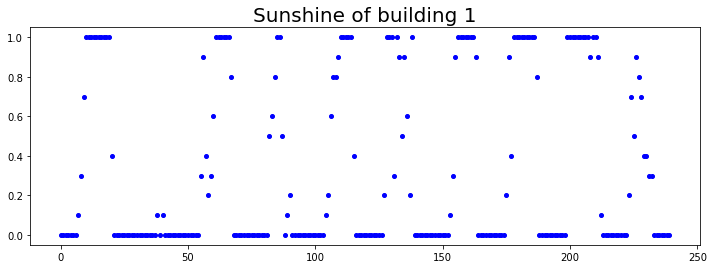

In [38]:
plt.figure(figsize = (12, 4))
plt.plot(train_dataset.sunshine[0:240], 'bo', markersize = 4)

plt.title('Sunshine of building 1', size = 20)
plt.show()

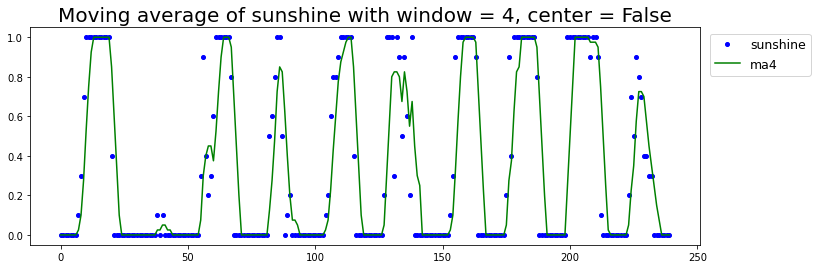

In [39]:
plt.figure(figsize = (12, 4))
plt.plot(train_dataset.sunshine[0:240], 'bo', markersize = 4, label = 'sunshine')
plt.plot(X_train.sunshine_rolling[0:240], 'g-', label = 'ma4')

plt.title('Moving average of sunshine with window = 4, center = False', size = 20)
plt.legend(bbox_to_anchor = (1.175, 1), fontsize = 12.5)
plt.show()

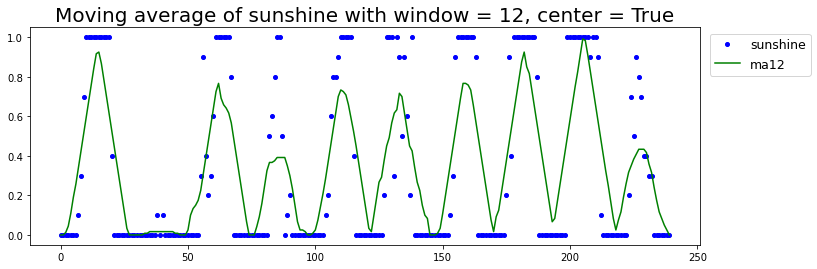

In [40]:
plt.figure(figsize = (12, 4))
plt.plot(train_dataset.sunshine[0:240], 'bo', markersize = 4, label = 'sunshine')
plt.plot(X_train_list[0].sunshine_rolling[0:240], 'g-', label = 'ma12')

plt.title('Moving average of sunshine with window = 12, center = True', size = 20)
plt.legend(bbox_to_anchor = (1.175, 1), fontsize = 12.5)
plt.show()

일조량 변수는 0에서 1로 빠르게 변하는 특징과 한번 0이나 1로 도달하면 오랜 시간동안 바뀌지 않는 특징을 가지고 있기 때문에 시간의 흐름을 설명하기 어렵다고 생각하였습니다. 또한, 낮 시간대의 일조량의 값이 모두 1이라 일조량이 많은 날과 많지 않은 날을 구분하기 힘들었습니다.

그래서 일조량 변수의 이동평균을 파생변수로 사용하여 시간의 흐름에 따라 완만하게 변하도록 만들었고, 일조량이 많은 날과 많지 않은 날을 구분할 수 있게 만들었습니다. 주변 4개의 값을 사용하는 방법과 주변 12개의 값을 사용하는 방법 두 가지를 사용해 모델링에 사용해 결과를 비교해보도록 하겠습니다.

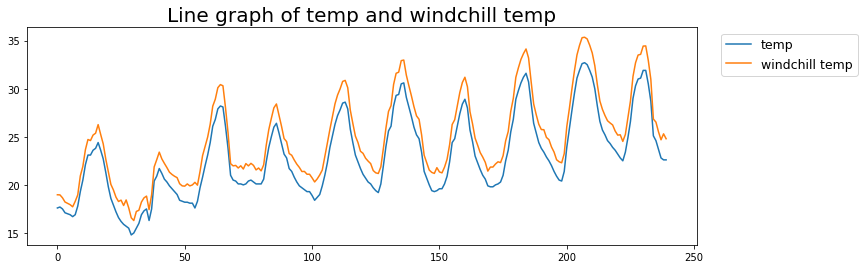

In [41]:
plt.figure(figsize = (12, 4))
plt.plot(X_train_list[0].temp[0:240], label = 'temp')
plt.plot(X_train_list[0].windchill_temp[0:240], label = 'windchill temp')

plt.title('Line graph of temp and windchill temp', size = 20)
plt.legend(bbox_to_anchor = (1.25, 1), fontsize = 12.5)
plt.show()

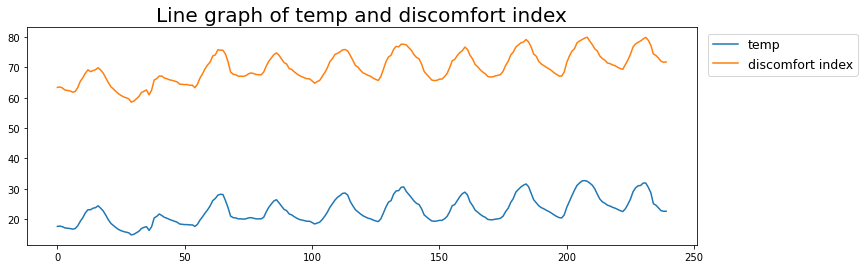

In [42]:
plt.figure(figsize = (12, 4))
plt.plot(X_train_list[0].temp[0:240], label = 'temp')
plt.plot(X_train_list[0].discomfort_index[0:240], label = 'discomfort index')

plt.title('Line graph of temp and discomfort index', size = 20)
plt.legend(bbox_to_anchor = (1.25, 1), fontsize = 12.5)
plt.show()

기온과 체감온도 그래프, 기온과 불쾌지수를 비교하기 위해 그래프를 출력해보았습니다. 두 파생변수 모두 기온을 사용하여 만들었기 때문에 같은 경향을 보입니다. 하지만  건물의 전력을 사용하는 주체가 건물을 이용하는 사람들이기 때문에 기온보다 사람들의 상태를 더 잘 설명할 수 있다고 생각해 두 개의 변수를 추가하였습니다. 

기상청 보도자료인 "전력수요 예측, 기상 빅데이터로 오차 줄여" (http://web.kma.go.kr/notify/press/kma_list.jsp?bid=press&mode=view&num=1192880) 를 참고하여 불쾌지수와 체감온도를 파생변수로 사용했습니다.